# Assignment 4 - Data Exploration (Evan Moh - AIPI510 Fall 2024 - 9/24/24)



## Welltory COVID-19 and Wearables Open Data Research


About the Data: The Welltory team conducted open research in 2020 to identify COVID-19 patterns using data from users who tracked symptoms, heart rate variability, and gadget data. The study, non-commercial and collaborative, aims to help fight the pandemic. The collected dataset is now available for researchers to explore and predict COVID-19 symptoms.

Git Repository for data: https://github.com/Welltory/hrv-covid19/tree/master <br>
Source of the information: https://github.com/Welltory/hrv-covid19/blob/master/README.md

## Data Context and Data Sampling

Users with positive COVID-19 status tracked their symptoms, heart rate variability, and data with the Welltory app.

### Welltory App

Welltory is a health app that helps users manage their stress and energy levels by analyzing heart rate variability through cardiointervalography and gathering lifestyle data from various apps, fitness trackers, and gadgets. It provides insights into how different lifestyle factors like sleep, diet, and exercise affect health indicators and offers personalized recommendations to maintain a balanced and healthy lifestyle. Users can measure their stress and energy levels using their phone's camera or a heart rate monitor, and track their progress with graphs and tips tailored to their specific needs.

Heart rate variability measurements - Measurements were made with any Bluetooth-enabled heart rate monitor or with a smartphone camera with a high resolution - a method called Photoplethysmography (PPG). 

Data from user- connected gadgets including devices such as Apple Watch and Garmin that sync with Google Fit or Apple Health.

Clinically validated physical and mental health assessments - The team created a feature specifically for this project, where people would add information about symptoms and test results.

### Biases and Limitations of Data

The primary users of new technology, such as the Welltory application, and those who wear smartwatches for these purposes are likely to be younger than the general population. These individuals may also be healthier, as they tend to be more health-conscious. However, due to the self-reporting nature of tracking COVID-19 symptoms and measuring heart rate variability, the data collected may be incomplete. Additionally, data from user-connected devices like Apple Watch and Garmin may not always be fully synchronized with the application. If users do not own smartwatches and only use the application for tracking other metrics, certain data points may be missing entirely. Therefore, the data can be fragmented unless users have all the necessary equipment. 

The research suggested by the Welltory team mentions that the accuracy of HRV measurements taken with a smartphone camera has been proven to be on par with the Polar H7 chest strap (Source: https://ieeexplore.ieee.org/document/8856540). However, this assumes that all tests are conducted under well-controlled conditions. For example, if users are in a dark room or shaking their fingers while taking HRV measurements, it can result in distorted data output.

## Understanding how the datasets look like
Source: https://github.com/Welltory/hrv-covid19/blob/master/datatypes.md

By examining the data types in the datasets, it is evident that every dataset contains a user_code column. The user_code column is associated with user information, and each dataset must include this column to identify the data's corresponding user.

## Data Structuring Strategy

In order to analyze the information, combining different tables is necessary. However, not every dataset is necessary for this analysis and not every column is necessary. Depending on the use case and the question that needs to be answered, some tables might not be necessary (example: survey scales, weather, etc).
As every dataset has user code information and user information is key to all the datasets, starting with user data to join other datasets is a good starting point.  <br>

To test the quality of the data, various datasets will be linked. To begin with, user information with HRV data will be merged.


## Getting the data from Git

In terminal, once connected to virtual environment, "git clone https://github.com/Welltory/hrv-covid19.git" in Mac OS will be able to download the information in the environment.

## Setting up - Importing Libraries and Data from Git

In [113]:
#Import all the libraries those are necessary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D


#import all the csv files from Git.
heart_rate = pd.read_csv('hrv-covid19/data/heart_rate.csv')
blood_pressure = pd.read_csv('hrv-covid19/data/blood_pressure.csv')
hrv_measurements= pd.read_csv('hrv-covid19/data/hrv_measurements.csv')
participants = pd.read_csv('hrv-covid19/data/participants.csv')
scales_description= pd.read_csv('hrv-covid19/data/scales_description.csv')
surveys= pd.read_csv('hrv-covid19/data/surveys.csv')
wearables= pd.read_csv('hrv-covid19/data/wearables.csv')
weather= pd.read_csv('hrv-covid19/data/weather.csv')

## Understanding the Participants

In [40]:
#Looking at how participants table look like
participants


user_code gender age_range           city        country  height  \
0    007b8190cf      m     25-34       Mandalay        Myanmar  170.18   
1    013f6d3e5b      f     18-24      São Paulo         Brazil  174.00   
2    01bad5a519      m     45-54  St Petersburg         Russia  178.00   
3    0210b20eea      f     25-34          Sochi         Russia  169.00   
4    024719e7da      f     45-54  St Petersburg         Russia  158.00   
..          ...    ...       ...            ...            ...     ...   
180  fd387f6269      f     35-44      Attleboro  United States  165.00   
181  fdc881a0a8      f     55-64         Moscow         Russia  160.00   
182  fde84801d8      f     45-54         Tambov         Russia  168.00   
183  fe5ca7e4ea      m     35-44  Dar es Salaam       Tanzania  168.00   
184  fe6c1b1349      f     25-34         Moscow         Russia  173.00   

      weight symptoms_onset  
0     96.162            NaN  
1     77.300      5/15/2020  
2     92.000       4/5/2020  
3     60.000       5/6/2020  
4     68.500      5/27/2020  
..       ...            ...  
180  115.439       5/1/2020  
181   53.000            NaN  
182   79.500      4/16/2020  
183   87.500            NaN  
184   53.000       5/3/2020  

[185 rows x 8 columns]

### Observing the participant data

In [255]:
#Grouping everyone by age range and seeing which age range has highest # of users.
participants.groupby('age_range').count()

user_code  gender  city  country  height  weight  symptoms_onset
age_range                                                                  
18-24             16      16    16       16      16      16              14
25-34             46      46    41       44      46      46              40
35-44             56      56    52       54      55      56              42
45-54             51      51    48       49      51      51              43
55-64              9       9     9        9       8       9               5
65-74              7       7     7        7       7       7               3

In [246]:
#Grouping to see # by gender
participants.groupby('gender').count()

user_code  age_range  city  country  height  weight  symptoms_onset
gender                                                                     
f             118        118   110      113     118     118              96
m              67         67    63       66      65      67              51

#### Interpretation

There are ~twice as many female users as male users in the dataset. The majority of the age group is between 25 and 54.

In [79]:
#Data structure work by seeing dimensions, data types, and missing values in Participants dataset.
print("Data Structure")
print("---------------")
print(f"Dimensions: {participants.shape}")
print(f"Data Types:\n{participants.dtypes}")
print(f"Missing Values:\n{participants.isnull().sum()}")

Data Structure
---------------
Dimensions: (185, 8)
Data Types:
user_code          object
gender             object
age_range          object
city               object
country            object
height            float64
weight            float64
symptoms_onset     object
dtype: object
Missing Values:
user_code          0
gender             0
age_range          0
city              12
country            6
height             2
weight             0
symptoms_onset    38
dtype: int64


#### Interpretation

There are 185 participants with each participant having 8 features describing the participants like gender, age range, city, country, height, weight, and symptoms onset. It seems that some values from city, country, height, and symptoms onset columns are missing. The dataset is not complete and imputation or deletion of rows/columns might be necessary depending on what analysis I will be doing.

In [57]:
# Descriptive Statistics
print("\nDescriptive Statistics")
print("----------------------")
numeric_columns = participants.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(participants[numeric_columns].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(participants[numeric_columns].describe().loc[['std', 'min', 'max']])

# Check for distribution normality (skewness and kurtosis)
print("\nDistribution Measures:")
print("------------------------")
print(participants[numeric_columns].skew())
print(participants[numeric_columns].kurt())


Descriptive Statistics
----------------------
Central Tendency Measures:
          height     weight
mean  169.976393  77.927757
50%   168.000000  74.344000

Dispersion Measures:
         height      weight
std   12.400103   19.552541
min  132.080000   43.500000
max  250.000000  154.221000

Distribution Measures:
------------------------
height    2.910275
weight    0.865345
dtype: float64
height    17.552808
weight     0.891368
dtype: float64


### Interpretation

#### Descriptive Statistics:
The mean and median provide insights into the central location of the data. The mean and median of height are close to each other which indicates roughly symmetric distribution. 

#### Dispersion Measures:
These measures give us an understanding of the spread and range of the data. For instance, standard deviation of height is about 12.4cm, indicating the typical deviation from the mean.

#### Distribution Measures:
Skewness values near 0 suggest a symmetric distribution, whereas positive or negative skewness indicates a distribution that is skewed to the right or left, respectively. Kurtosis measures the "tailedness" of the distribution; values around 0 imply a normal distribution, while higher kurtosis indicates more pronounced tails.<br>
Source: https://colab.research.google.com/github/AIPI510/aipi510-fall24/blob/lecture-code/week_5_lecture_eda.ipynb#scrollTo=KaqH-JJilV8I

Height skewness of 2.91 indicates a right skewed distribution and weight skewness of 0.87 indicates a slight right skew. 
Height kurtosis of 17.55 indicates a heavy tailed distribution, much higher than a normal distribution. Weight kurtosis of 0.89 indicates close to a normal distribution.

## Understanding HRV Measurements Data

In [58]:
# Data structure work by seeing dimensions, data types, and missing values for HRV Measurement dataset
print("Data Structure")
print("---------------")
print(f"Dimensions: {hrv_measurements.shape}")
print(f"Data Types:\n{hrv_measurements.dtypes}")
print(f"Missing Values:\n{hrv_measurements.isnull().sum()}")

Data Structure
---------------
Dimensions: (3245, 22)
Data Types:
user_code                object
rr_code                  object
measurement_datetime     object
time_of_day              object
bpm                       int64
meanrr                  float64
mxdmn                   float64
sdnn                    float64
rmssd                   float64
pnn50                   float64
mode                    float64
amo                     float64
lf                      float64
hf                      float64
vlf                     float64
lfhf                    float64
total_power             float64
how_feel                  int64
how_mood                  int64
how_sleep               float64
tags                     object
rr_data                  object
dtype: object
Missing Values:
user_code                  0
rr_code                    0
measurement_datetime       0
time_of_day                0
bpm                        0
meanrr                     0
mxdmn                     

#### Interpretation

There are 3245 data records in this dataset with ~21 variables. Majority of the datasets have full data values but how_sleep and tags columns have 1,779 and 1,044 missing values. If these values are critical for data analysis, understanding more about these columns is necessary to handle this.

In [42]:
# Descriptive Statistics
print("\nDescriptive Statistics")
print("----------------------")
numeric_columns = hrv_measurements.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(hrv_measurements[numeric_columns].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(hrv_measurements[numeric_columns].describe().loc[['std', 'min', 'max']])

# Check for distribution normality (skewness and kurtosis)
print("\nDistribution Measures:")
print("------------------------")
print(hrv_measurements[numeric_columns].skew())
print(hrv_measurements[numeric_columns].kurt())


Descriptive Statistics
----------------------
Central Tendency Measures:
            bpm      meanrr     mxdmn       sdnn      rmssd      pnn50  \
mean  73.257935  839.600366  0.184635  52.489218  52.814196  20.615609   
50%   72.000000  829.100000  0.160000  46.919000  42.869000  16.160000   

          mode       amo          lf           hf         vlf      lfhf  \
mean  0.837465  46.78829  927.038213  1125.041294  578.229892  2.397769   
50%   0.825000  45.00000  423.000000   380.000000  293.000000  0.862000   

      total_power  how_feel  how_mood  how_sleep  
mean  2630.309399 -0.235439 -0.076733  -0.065484  
50%   1387.000000  0.000000  0.000000   0.000000  

Dispersion Measures:
            bpm       meanrr     mxdmn        sdnn       rmssd      pnn50  \
std   12.201088   137.420367  0.107456   29.369506   39.353213  18.588156   
min   44.000000   477.730000  0.030000    9.515000    6.340000   0.000000   
max  125.000000  1346.740000  0.790000  206.631000  310.800000  91.9200

#### Interpretation
Looking at kurtosis of lf: 19, hf: 35, vlf: 76, lfhf: 93, and total_power: 18 indicate that the distribution is far away from gaussian distribution. This will determin which outlier removal method will be used in the later places.

### Understanding HRV data
Source: https://www.frontiersin.org/journals/public-health/articles/10.3389/fpubh.2017.00258/full <br>
"Heart rate is the number of heartbeats per minute. Heart rate variability (HRV) is the fluctuation in the time intervals between adjacent heartbeats."

LF power ms^2: Absolute power of the low-frequency band (0.04-0.15Hz)
HF power ms^2: Absolute power of the high-frequency band (0.15-0.4Hz)

### Looking at Outliers and Errors

Having domain expertise on data can help understanding outliers and data errors. For data collection validation, it is often good idea to comapre with external datasets or other data sources to compare the values.

Study done by Nunan analyzed ~35 studies to analyze the HRV values such as ranges and mean value of SDNN(ms), RMSSD(ms), LF(ms^2), and HF(ms^2). <br>
SDNN (ms) range: 32-93; mean: 50 <br>
RMSSD (ms) range: 19-75; mean: 42 <br>
LF (ms^2) range 193-1,009; mean: 519 <br>
HF (ms^2) range 83-3,630; mean: 657

Source:
 Nunan D, Sandercock GRH, Brodie DA. A quantitative systematic review of normal values for short-term heart rate variability in healthy adults. Pacing Clin Electrophysiol (2010) 33:1407–17. doi:10.1111/j.1540-8159.2010.02841.x <br>
https://www.frontiersin.org/journals/public-health/articles/10.3389/fpubh.2017.00258/full#B17

Comparing the means between Welltory vs. the study:<br>
SDNN (ms): 52 (Welltory) vs 50 (Study) <br>
RMSSD (ms): 52 (Welltory) vs 42 (Study)<br>
LF (ms^2): 927 (Welltory) vs 519 (Study)<br>
HF (ms^2): 1125 (welltory) vs 657 (Study)

-- Both Welltory's and Study's SDNN values are pretty comparable. However, Welltory has significantly higher values for RMSSD, LF, and HF values compared to values from the study. 

When we compare the ranges (max, especially), LF and HF values look very different for Welltory vs. study. <br>
LF min: 2 (Welltory) vs 193 (Study) <br>
LF max: 15522 (Welltory) vs 1009 (Study) <br>
HF min: 4 (Welltory) vs 83 (Study) <br>
HF max: 33490 (Welltory) vs 3630 (Study) <br>

Consulting with the medical/HRV expert will make this dataset more confident before analyzing the data. However, given that the values being at least 10x greater compared to the study, it seems that outliers/data errors exist in the datasets. More will come in historgram/boxplot analysis in data quality section.

### Merging participants data and HRV measurements before start analyzing and checking data quality

In [86]:
#merging data for participants and hrv measurements. Doing left join as participants are the main one we do not want to lose data
merged_data = pd.merge(participants, hrv_measurements, on='user_code', how='left')
merged_data_numeric = merged_data.select_dtypes(include=[np.number]).columns
merged_data.head()

user_code gender age_range           city  country  height  weight  \
0  007b8190cf      m     25-34       Mandalay  Myanmar  170.18  96.162   
1  007b8190cf      m     25-34       Mandalay  Myanmar  170.18  96.162   
2  013f6d3e5b      f     18-24      São Paulo   Brazil  174.00  77.300   
3  013f6d3e5b      f     18-24      São Paulo   Brazil  174.00  77.300   
4  01bad5a519      m     45-54  St Petersburg   Russia  178.00  92.000   

  symptoms_onset     rr_code measurement_datetime  ...     lf      hf     vlf  \
0            NaN  10489a6aea  2020-04-21 21:23:08  ...  508.0  1076.0   267.0   
1            NaN  9610d4d4dc  2020-04-26 11:19:25  ...  409.0   310.0   176.0   
2      5/15/2020  f3de056155  2020-05-15 04:14:21  ...  432.0   881.0   194.0   
3      5/15/2020  b04489e32f  2020-05-19 03:06:02  ...  814.0  1487.0  1719.0   
4       4/5/2020  ac52c706c6  2019-12-31 09:07:43  ...  489.0   128.0    96.0   

    lfhf  total_power  how_feel  how_mood  how_sleep  \
0  0.472       1851.0         0        -1        NaN   
1  1.319        895.0         0         0        0.0   
2  0.490       1507.0        -1        -2        NaN   
3  0.547       4020.0         0         0        NaN   
4  3.820        713.0         0         0        0.0   

                                                tags  \
0  COVID-19; Workout; Sex; Hobby; Studying; Sleep...   
1                                                NaN   
2  COVID-19; Fast/Diet; Hungry; Tired; Fever; I c...   
3                                                NaN   
4                                                NaN   

                                             rr_data  
0  819,1008,831,847,785,778,866,839,801,793,846,8...  
1  888,775,811,883,890,894,894,899,893,889,890,83...  
2  694,832,642,801,751,716,737,742,773,760,701,73...  
3  821,817,771,805,833,788,747,724,792,825,775,75...  
4  741,740,734,737,740,731,751,747,745,728,747,76...  

[5 rows x 29 columns]

## Data Quality

    Are there any duplicated rows or inconsistent values?
    Are there any outliers or extreme values that need attention?
    Do the values make sense based on context and domain knowledge?


In [55]:
# Data Quality check by looking at duplicates and inconsistent values.
print("\nData Quality")
print("------------")
print(f"Duplicated Rows: {merged_data.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print((merged_data).apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))


Data Quality
------------
Duplicated Rows: 0
Checking for Inconsistent Values:
                                                    most_frequent_value
user_code                                                    a62c11c164
gender                                                                f
age_range                                                         45-54
city                                                             Moscow
country                                                          Russia
height                                                            175.0
weight                                                             82.1
symptoms_onset                                                 4/1/2020
rr_code                                                      10489a6aea
measurement_datetime                                2020-05-15 09:31:35
time_of_day                                                     morning
bpm                                                     

#### Interpretation

Duplicated Rows: There are no duplicated rows in the dataset. 
Inconsistent Values: Most frequent values for each column. This helps identify any potential inconsistencies or anomalies. For example, if an unusually high frequency is observed for a specific value, it might indicate an issue with data collection or entry.

Source: https://colab.research.google.com/github/AIPI510/aipi510-fall24/blob/lecture-code/week_5_lecture_eda.ipynb#scrollTo=GqCWqGlGlqPb

Comments about outliers using mean values and outliers had been done in the above section. 

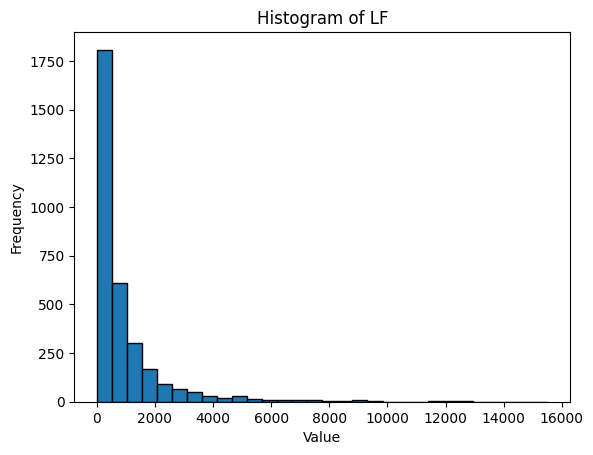

In [63]:
#Creating histogram to observe outliers visually in LF column
plt.hist(merged_data['lf'], bins=30, edgecolor='black')
plt.title('Histogram of LF')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Referring back to the study done for HRV values, When we compare the ranges LF values, it is apparent that Welltory's LF values have many outliers. <br>
LF min: 2 (Welltory) vs 193 (Study) <br>
LF max: 15522 (Welltory) vs 1009 (Study) <br>

Max value of Welltory's LF goes to 15522 and has multiple values above 6000 ms^2 range according to the histogram.

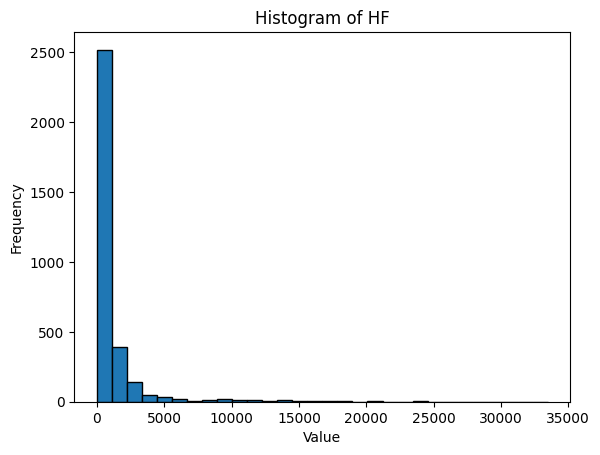

In [64]:
#Creating histogram to observe outliers visually in HF column
plt.hist(merged_data['hf'], bins=30, edgecolor='black')
plt.title('Histogram of HF')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Referring back to the study done for HRV values, When we compare the ranges HF values, it is apparent that Welltory's HF values have many outliers. <br>
HF min: 4 (Welltory) vs 83 (Study) <br>
HF max: 33490 (Welltory) vs 3630 (Study) <br>

Max value of Welltory's HF goes up to 33490 and has multiple values above 7000 ms^2 range according to the histogram.

#### Data profiling <br>
Via exploratory data analysis - please refer to information above sections.

#### Data completeness <br>
Check for missing values and incomplete records. From participants dataset, it seems that some values from city, country, height, and symptoms onset columns are missing. The dataset is not complete and imputation or deletion of rows/columns might be necessary depending on what analysis I will be doing. From HRV dataset, majority of the datasets have full data values but how_sleep and tags columns have 1,779 and 1,044 missing values. If these values are critical for data analysis, understanding more about these columns is necessary to handle this.

#### Data accuracy<br>
Cross check against trusted sources or via manual validation.

Study done by Nunan analyzed ~35 studies to analyze the HRV values such as ranges and mean value of SDNN(ms), RMSSD(ms), LF(ms^2), and HF(ms^2). <br>
SDNN (ms) range: 32-93; mean: 50 <br>
RMSSD (ms) range: 19-75; mean: 42 <br>
LF (ms^2) range 193-1,009; mean: 519 <br>
HF (ms^2) range 83-3,630; mean: 657

Source:
 Nunan D, Sandercock GRH, Brodie DA. A quantitative systematic review of normal values for short-term heart rate variability in healthy adults. Pacing Clin Electrophysiol (2010) 33:1407–17. doi:10.1111/j.1540-8159.2010.02841.x <br>
https://www.frontiersin.org/journals/public-health/articles/10.3389/fpubh.2017.00258/full#B17

Comparing the means between Welltory vs. the study:<br>
SDNN (ms): 52 (Welltory) vs 50 (Study) <br>
RMSSD (ms): 52 (Welltory) vs 42 (Study)<br>
LF (ms^2): 927 (Welltory) vs 519 (Study)<br>
HF (ms^2): 1125 (welltory) vs 657 (Study)

-- Both Welltory's and Study's SDNN values are pretty comparable. However, Welltory has significantly higher values for RMSSD, LF, and HF values compared to values from the study. Please read above section for more information about data accuracy.

#### Data consistency<br>
Ensure consistency across sources, formats, and time period. The format of participants dataset and HRV dataset are somewhat consistent in terms of format. However, there is someone with 250cm in height which cannot be possible as tallest person alive in the world is 251cm. There might be some error. How_feel, How_sleep, How_mood columns are using negative values and negative values which are not explained in readme document. It is difficult what each of the variable means.

#### Data integrity<br>
Enforce data constraints (i.e. UUID, valid value range); User code is unique and there is no duplication in the data. In the other datasets than participants, there is no primary id for those. All the datasets have user code that can be linked together but this is not ideal. Data is trustworthy in some aspects but not completely trustworthy due to areas of opportunity.

#### Data lineage and provenance
Understand sources, transformations, and processes applied to the data. Where did the data come from? The data collection approach and more information about Welltory is mentioned on the top of the page. Heart rate variability measurements - Measurements were made with any Bluetooth-enabled heart rate monitor or with a smartphone camera with a high resolution - a method called Photoplethysmography (PPG). Data from user- connected gadgets including devices such as Apple Watch and Garmin that sync with Google Fit or Apple Health. Clinically validated physical and mental health assessments - The team created a feature specifically for this project, where people would add information about symptoms and test results. There are limitations to this data.



### Strategies to handle missing values, outliers, and removing duplicates

#### Removing Duplicates
Because we checked in earlier section that there is no duplicate in the dataset, we can skip this step. If there was duplicates, we could used "drop_duplicates()" method.

#### Missing Values

There are three types of missing data. Missing at random, missing not at random, and missing completely at random. Depending on types of missing data, we need to be strategic in how we handle them. In our case of the survey data within HRV dataset, it is mostly likely that the column of 'How_sleep' fall into 'Missing Completely at Random' category as people might not have filled out sleep surveys. Because almost 50% of the results do not have this information, we will impute the data by taking mean to cover for missingness.

In [193]:
#Imputing the data through mean values.
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(merged_data[merged_data_numeric])
imputed_df = pd.DataFrame(imputed_data, columns=merged_data_numeric)


In [194]:
imputed_df

height  weight   bpm  meanrr  mxdmn    sdnn   rmssd  pnn50   mode   amo  \
0     170.18  96.162  75.0  795.90   0.12  45.802  54.174  15.15  0.775  53.0   
1     170.18  96.162  70.0  858.00   0.11  32.889  33.022  16.16  0.875  54.0   
2     174.00  77.300  83.0  724.10   0.17  54.811  65.987  17.17  0.725  46.0   
3     174.00  77.300  75.0  802.64   0.20  72.223  70.039  22.22  0.825  43.0   
4     178.00  92.000  78.0  768.07   0.10  29.650  21.196   4.04  0.775  56.0   
...      ...     ...   ...     ...    ...     ...     ...    ...    ...   ...   
3240  173.00  53.000  79.0  762.99   0.20  54.402  37.644  16.16  0.725  38.0   
3241  173.00  53.000  91.0  655.95   0.16  48.130  31.550   9.09  0.625  32.0   
3242  173.00  53.000  80.0  752.38   0.22  63.191  54.655  20.20  0.775  38.0   
3243  173.00  53.000  77.0  782.22   0.19  73.590  52.788  12.12  0.775  43.0   
3244  173.00  53.000  80.0  743.40   0.13  33.025  18.974   4.04  0.775  48.0   

          lf      hf     vlf   lfhf  total_power  how_feel  how_mood  \
0      508.0  1076.0   267.0  0.472       1851.0       0.0      -1.0   
1      409.0   310.0   176.0  1.319        895.0       0.0       0.0   
2      432.0   881.0   194.0  0.490       1507.0      -1.0      -2.0   
3      814.0  1487.0  1719.0  0.547       4020.0       0.0       0.0   
4      489.0   128.0    96.0  3.820        713.0       0.0       0.0   
...      ...     ...     ...    ...          ...       ...       ...   
3240  1075.0   435.0  1304.0  2.471       2814.0      -1.0      -1.0   
3241  1630.0   226.0   781.0  7.212       2637.0       0.0       0.0   
3242  2611.0   524.0   426.0  4.983       3561.0       1.0       0.0   
3243   381.0   204.0  1258.0  1.868       1843.0      -1.0       0.0   
3244   221.0   137.0   141.0  1.613        499.0      -1.0       0.0   

      how_sleep  
0     -0.065484  
1      0.000000  
2     -0.065484  
3     -0.065484  
4      0.000000  
...         ...  
3240  -0.065484  
3241  -1.000000  
3242   1.000000  
3243   0.000000  
3244   0.000000  

[3245 rows x 18 columns]

#### Outliers

Outliers usually come from 5 different places. <br>
Measurement Error: measurement tool for collecting data is faulty or inaccurate. <br>
Data entry error: Invalid data collection, data entry, or measurement by humans. <br>
Experimental error: Errors while planning and executing the experiment. <br>
Data processing error: data modeling and manipulation to process data can lead to the creation of outliers if not performed correctly. <br>
True outlier: Outliers that are not created due to human error are natural outliers.

We can detect outliers by visualizations like scatter plots or box plots (scatter plot approach is done above). 

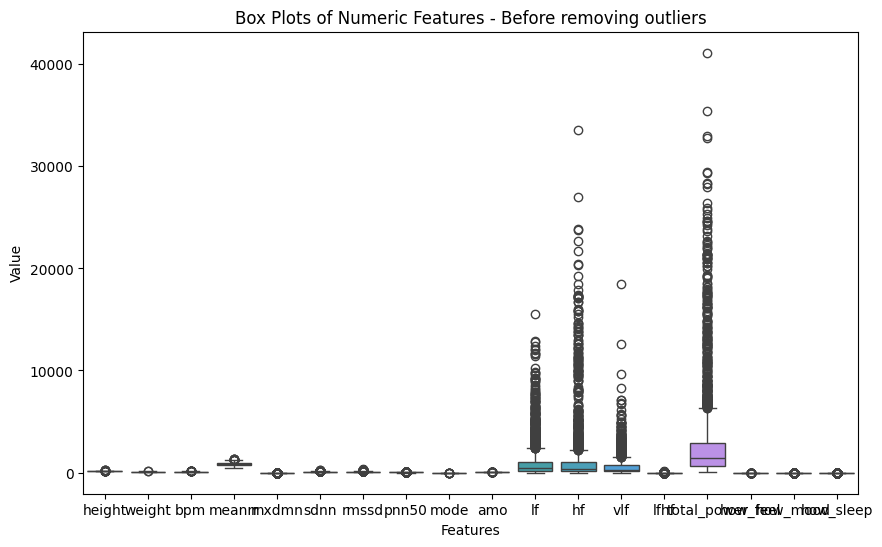

In [195]:
#Visualizing all the outliers all at once for all the numeric values.
plt.figure(figsize=(10, 6))
sns.boxplot(data=imputed_df)
plt.title('Box Plots of Numeric Features - Before removing outliers')
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

#### Interpretation

By looking at lf, hf, vlf, and total_power, the values have many outliers going outside of the box plot. We will use IQR method as these datasets are non-Gaussian distribution.

In [237]:
imputed_df_clean = imputed_df.copy()

#calculating lower and upper bound through IQR approach
for col in imputed_df_clean:

#How_feel, How_mood, and How_sleep columns are categorical values. Therefore, there should not be any outliers. When this happens, go to other column.
    if col in ['how_feel','how_mood','how_sleep']:
        continue
    else:
        Q1 =imputed_df_clean[col].quantile(0.25)
        Q3 = imputed_df_clean[col].quantile(0.75)
        IQR = Q3-Q1

        lower = Q1 - 1.5 *IQR
        upper = Q3 + 1.5 * IQR
        #redefining imputed df after removing outliers
        imputed_df_clean = imputed_df_clean[(imputed_df_clean[col]>= lower)& (imputed_df_clean[col]<=upper)]

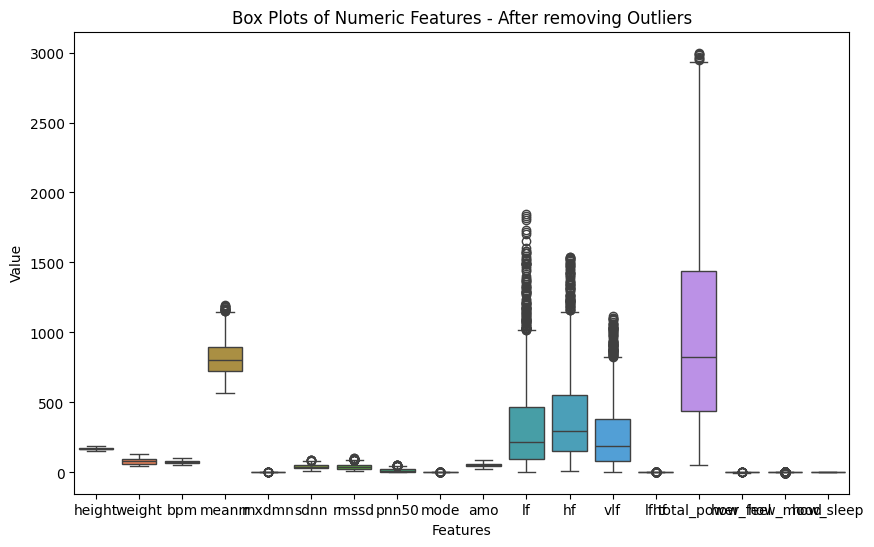

In [238]:
#Show boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=imputed_df_clean)
plt.title('Box Plots of Numeric Features - After removing Outliers')
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

#### Interpretation

There are data values that go out of boxplot but it seems that heavy outliers like value greater than 10000 had been removed.

## Adding New Feature

Using height and weight values, we can calculate BMI (Body Mass Index) and use this for analysis. The way to calculate is weight in kg divided by height^2 in m.

In [239]:
#Adding new column called BMI which can be score for health risk.
imputed_df_clean['bmi'] = imputed_df_clean['weight']/((imputed_df_clean['height']*0.01)**2)
imputed_df_clean_numeric = imputed_df_clean.select_dtypes(include=[np.number]).columns #as new column had been created; new numeric columns are defined.

imputed_df_clean.head()

height  weight   bpm  meanrr  mxdmn    sdnn   rmssd  pnn50   mode   amo  \
0  170.18  96.162  75.0  795.90   0.12  45.802  54.174  15.15  0.775  53.0   
1  170.18  96.162  70.0  858.00   0.11  32.889  33.022  16.16  0.875  54.0   
2  174.00  77.300  83.0  724.10   0.17  54.811  65.987  17.17  0.725  46.0   
4  178.00  92.000  78.0  768.07   0.10  29.650  21.196   4.04  0.775  56.0   
6  178.00  92.000  73.0  823.04   0.12  33.033  22.525   1.01  0.825  56.0   

      lf      hf    vlf   lfhf  total_power  how_feel  how_mood  how_sleep  \
0  508.0  1076.0  267.0  0.472       1851.0       0.0      -1.0  -0.065484   
1  409.0   310.0  176.0  1.319        895.0       0.0       0.0   0.000000   
2  432.0   881.0  194.0  0.490       1507.0      -1.0      -2.0  -0.065484   
4  489.0   128.0   96.0  3.820        713.0       0.0       0.0   0.000000   
6  312.0   146.0  160.0  2.137        618.0       0.0       0.0  -0.065484   

         bmi  
0  33.203698  
1  33.203698  
2  25.531774  
4  29.036738  
6  29.036738

#### Interpretation

Body Mass Index (BMI) is a useful and inexpensive way to assess a person's weight in relation to their height. It can help identify if a person is at a healthy weight, or if they are overweight or underweight. BMI can help identify a person's risk for certain health problems, such as heart disease.

## Data Transformation

Determining between Min-Max scaling and Z score standardization for this type of dataset requires careful consideration. Min Max scaling makes no distribution assumptions and is sensitive to outliers. It is often used for binary/categorical data which has bounded data. Z score standardization assumes data is normally distributed. It needs to handle outliers beforehand. As we removed all the outliers from previous steps, we will go with Z score standardization.

In [240]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_df_clean)

#Back to DF for readibility and using pandas features
scaled_df = pd.DataFrame(scaled_data, columns=imputed_df_clean_numeric)


## Variable Relationship

    Is there any correlation between pairs of numerical variables?
    Are there any noticeable patterns or trends in the data?
    How are categorical variables related to numerical variables?



Variable Relationships
----------------------
Correlation Matrix:
               height    weight       bpm    meanrr     mxdmn      sdnn  \
height       1.000000  0.496859 -0.039029  0.009355  0.032339  0.014718   
weight       0.496859  1.000000  0.409985 -0.404056 -0.285489 -0.272209   
bpm         -0.039029  0.409985  1.000000 -0.980123 -0.488090 -0.466272   
meanrr       0.009355 -0.404056 -0.980123  1.000000  0.476626  0.455159   
mxdmn        0.032339 -0.285489 -0.488090  0.476626  1.000000  0.883694   
sdnn         0.014718 -0.272209 -0.466272  0.455159  0.883694  1.000000   
rmssd       -0.022548 -0.175602 -0.351054  0.352301  0.652585  0.832433   
pnn50       -0.038718 -0.255673 -0.489004  0.517432  0.644971  0.641091   
mode         0.013643 -0.395339 -0.971260  0.991615  0.470015  0.446959   
amo          0.029453  0.342222  0.525435 -0.512164 -0.729347 -0.700846   
lf           0.083710 -0.243927 -0.329886  0.310776  0.594563  0.578963   
hf          -0.071658 -0.282283 -

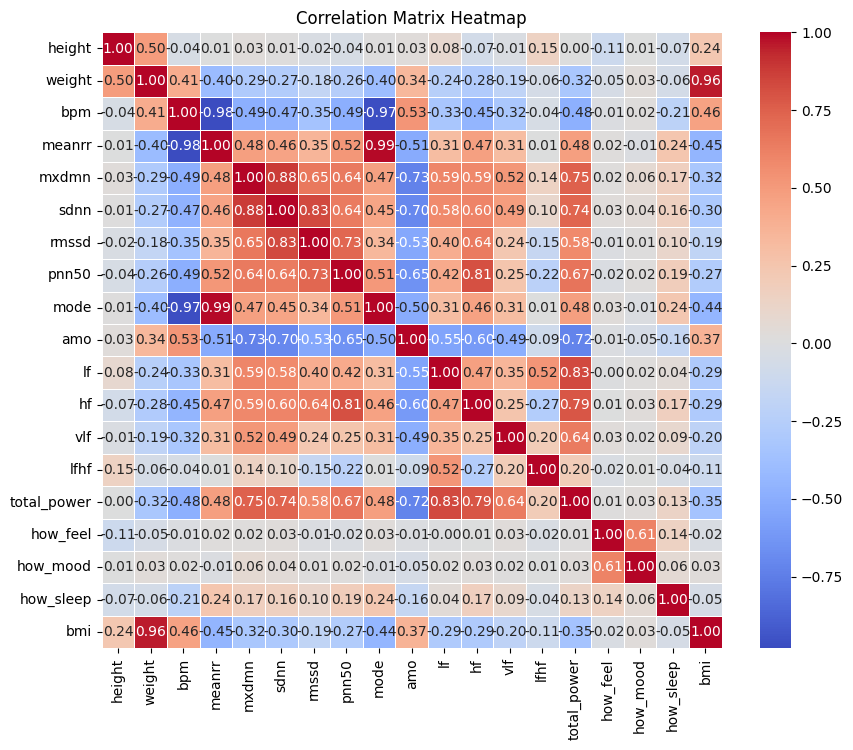

In [241]:
# Variable Relationships
print("\nVariable Relationships")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix = scaled_df.corr()
print(correlation_matrix)

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Interpretation

Positive correlation values (close to 1) indicate a strong direct relationship, while negative values (close to -1) indicate an inverse relationship. Important aspect in understanding the correlation of this dataset is that the columns here can be related. For example, total_power is highly correlated with lf, hf, and vlf because total_power's definition is the total power of hF, LF, and VLF waves generated by heart. interpreting this with context is necessary. It seems like through the outlier removal process, how mood was completely eliminated or brought the exactly same value. We would go back to it if it was necessary but as this column is not necessary for our analysis, we will skip this step. In addition, how feel, how sleep values would have been categorical data even when they were in numeric format. Outlier removal through IQR approach might not work the best for categorical data by observing this.

## Dimentionality Reduction

Dimentionality reduction transforms high-dimensional data into lower dimensions. We will use PCA which is optimal for dense data with gaussian features. Limitation for this is information loss, assumes linear relationships. Before choosing n size, we will test how many PC is needed.

In [223]:
#Setting up PCA
pca = PCA() 
principal_components = pca.fit_transform(scaled_df)

Choosing n component for PCA: optimal number of principal component to retain in PCA depends on balancing the trade-off between reducing dimensionality and preserving as much of the original data's variance as possible. We would like to have scree plot to determine where the elbow point happens.

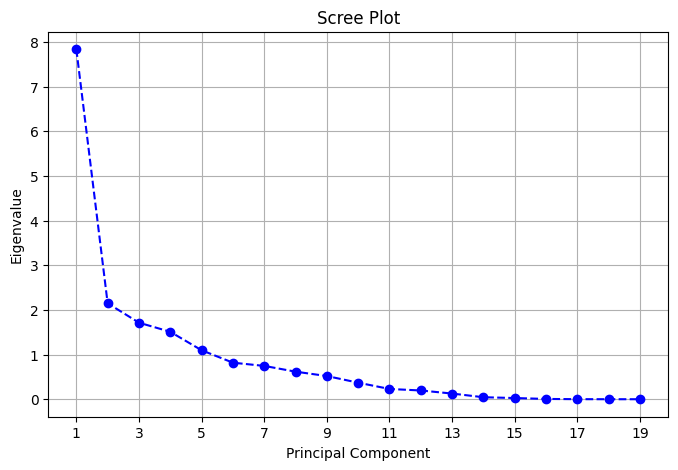

In [224]:
# calculating eigenvalues
eigenvalues = pca.explained_variance_

# Plot the Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.xticks(ticks=range(1, len(eigenvalues) + 1, 2))  # X-axis labels go up by 2
plt.grid(True)
plt.show()


### Interpretation

By observing the data, it seems like elbow point happens when it reached PC=3. It seems like PC of 3 is ideal for this data. This means, the dataset has been reduced from its original (high dimensional one) to lower dimensional one. First principal component captures the largest variance in the data (It represents the most significant underlying patterns). The following ones are the next largest variance. We will stick to n=3 for this experiment for the next visualizations.

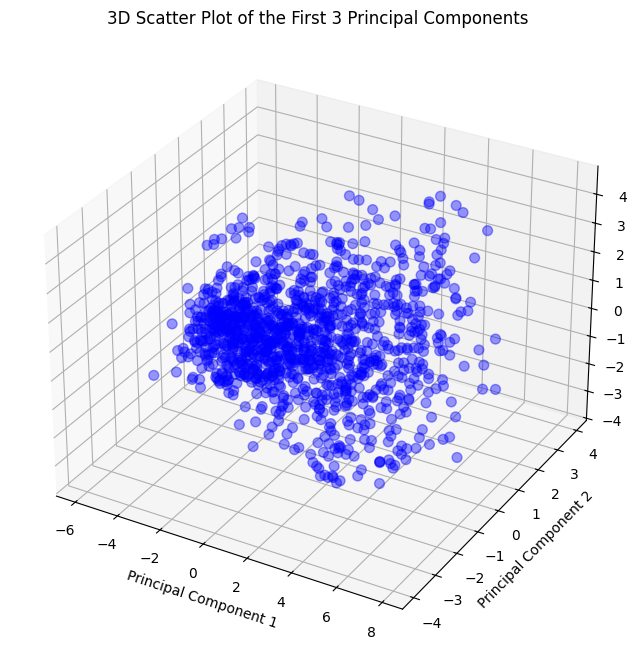

In [225]:
pca = PCA(n_components=3) 
principal_components = pca.fit_transform(scaled_df)

# Convert the PCA result into a DataFrame
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='blue', s=50, alpha=0.4)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of the First 3 Principal Components')
plt.show()

#### Interpretation
Though it is difficult to interpret this in 3D, you can see linear regression happening for the 3 components. You can see more clearly when it is compared with PC1 and PC3.

## Additional Visualizations for additional Patterns/Insights
How can the variables be visualized effectively (histograms, scatterplots, box plots, etc.)? <br>
Do the visualizations reveal any interesting patterns or insights? <br>
Are there any subgroups or clusters that can be identified visually? 

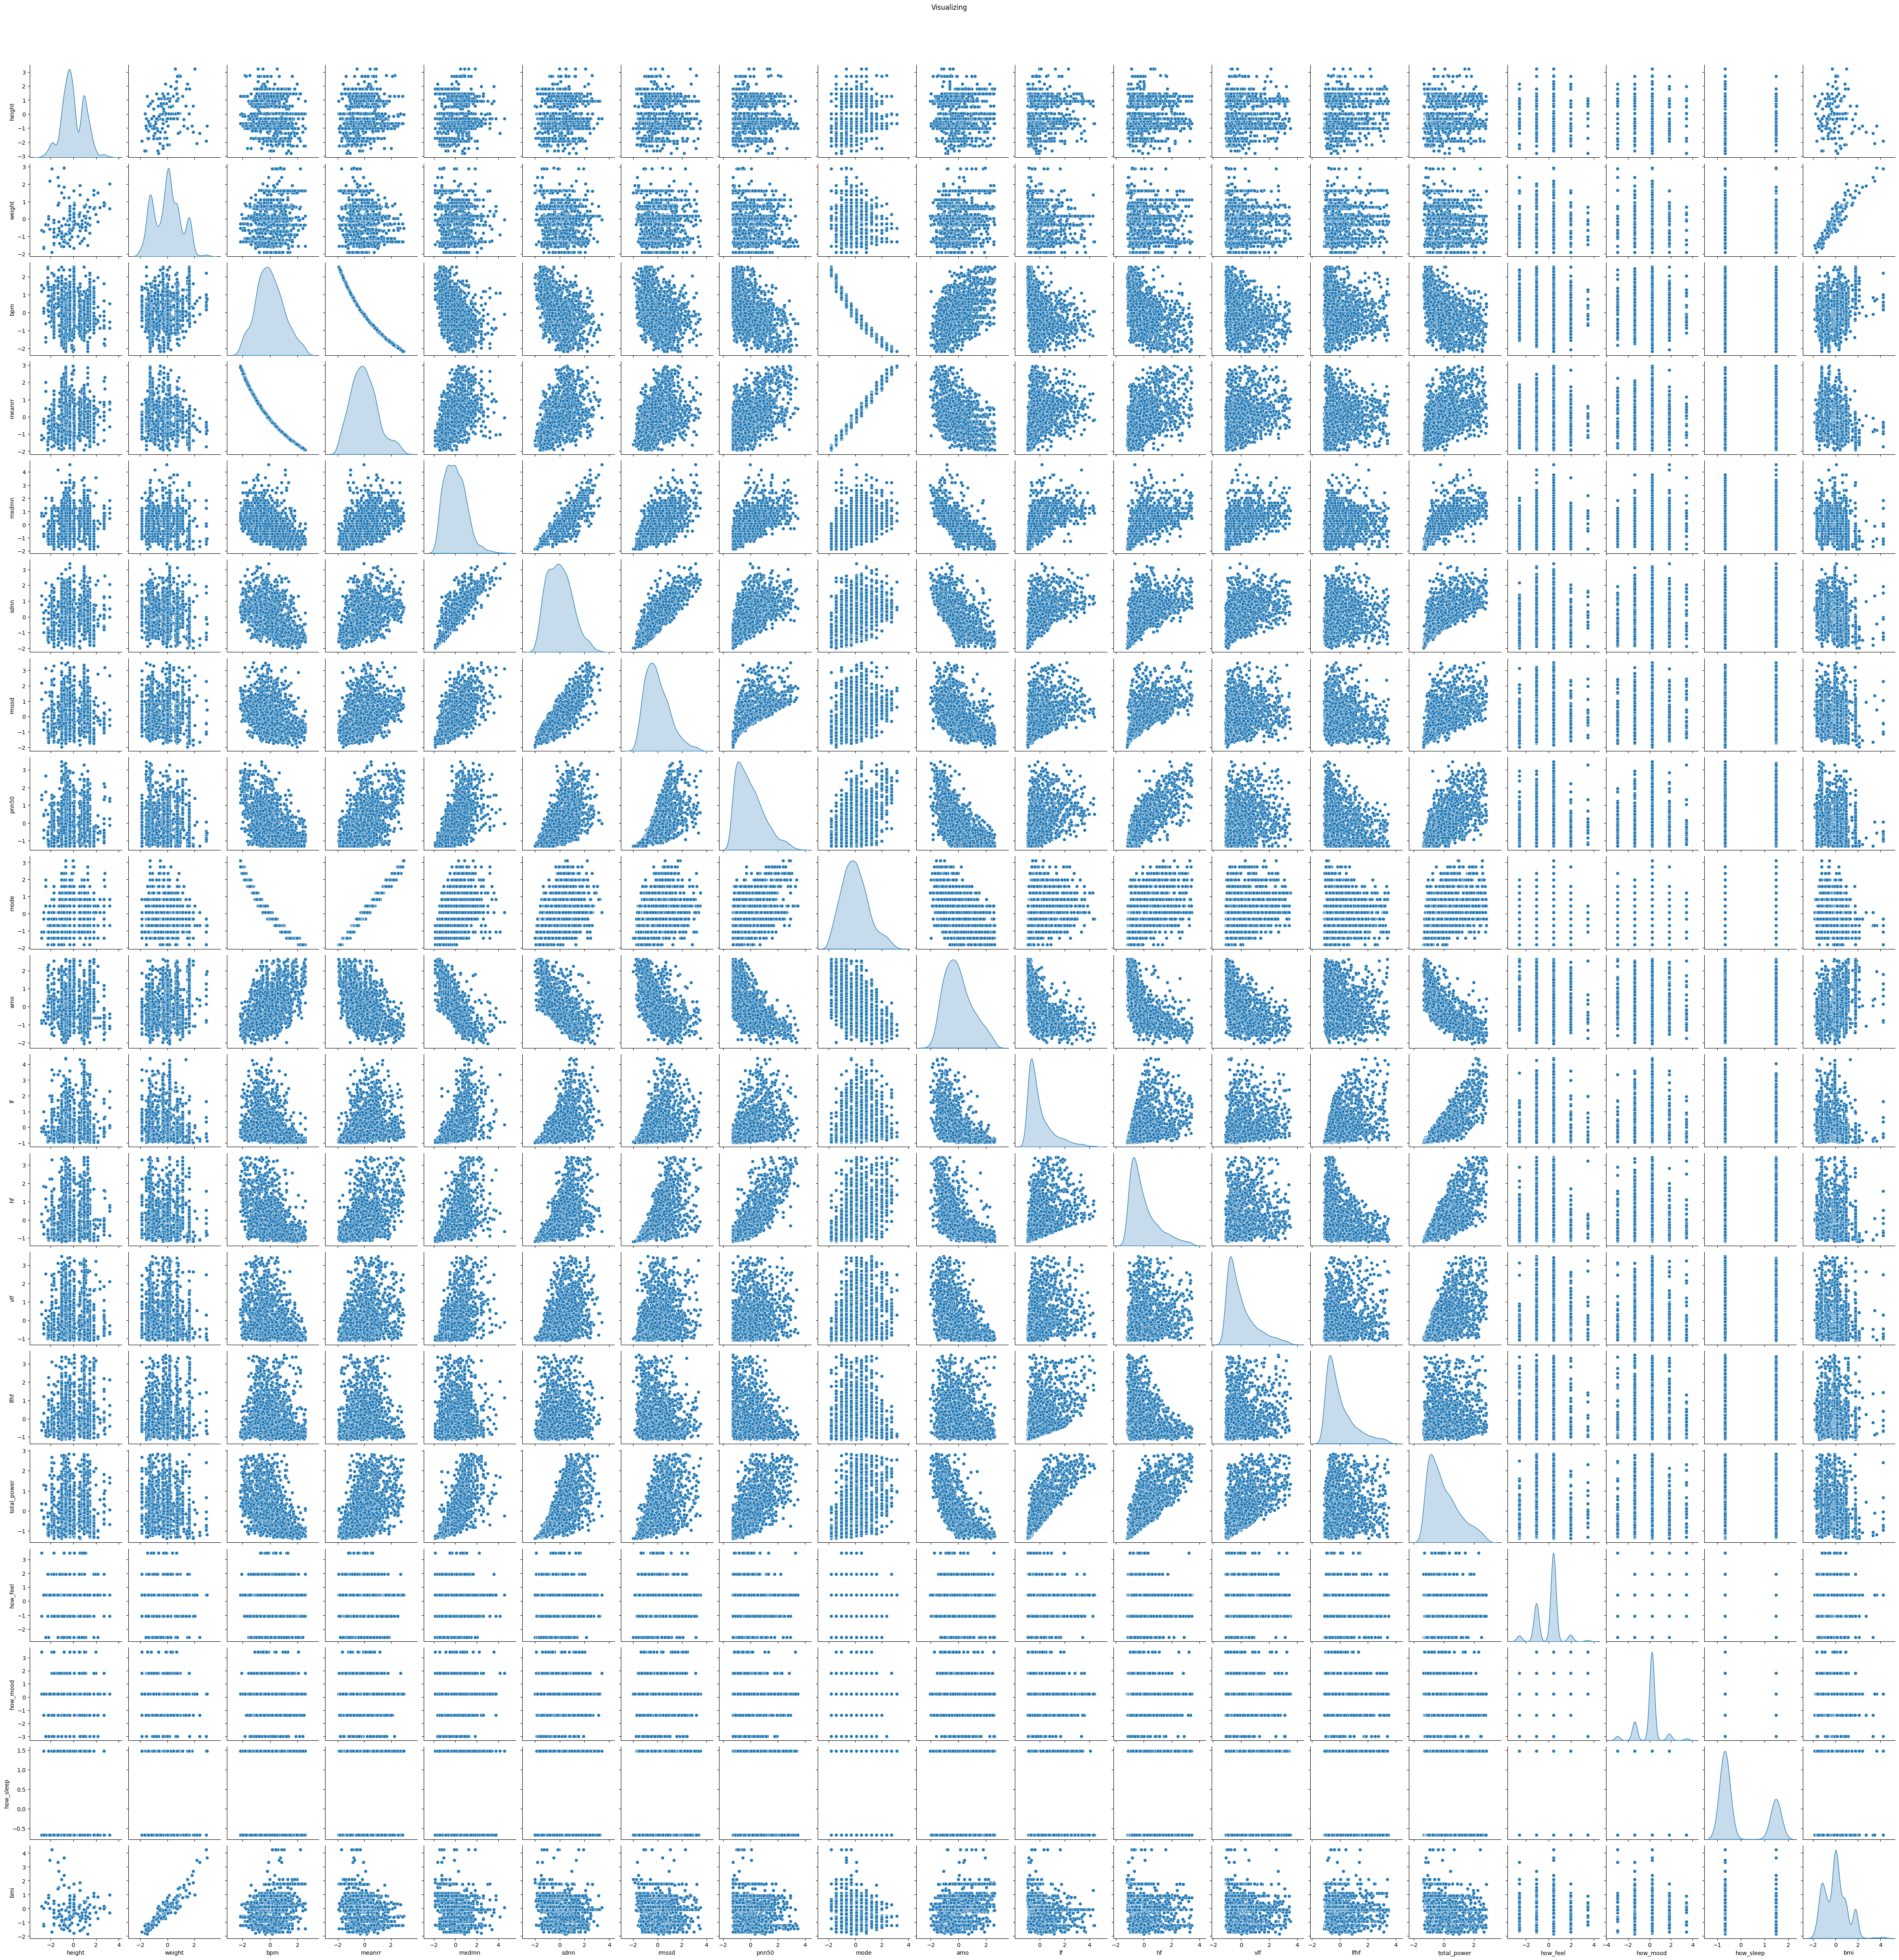

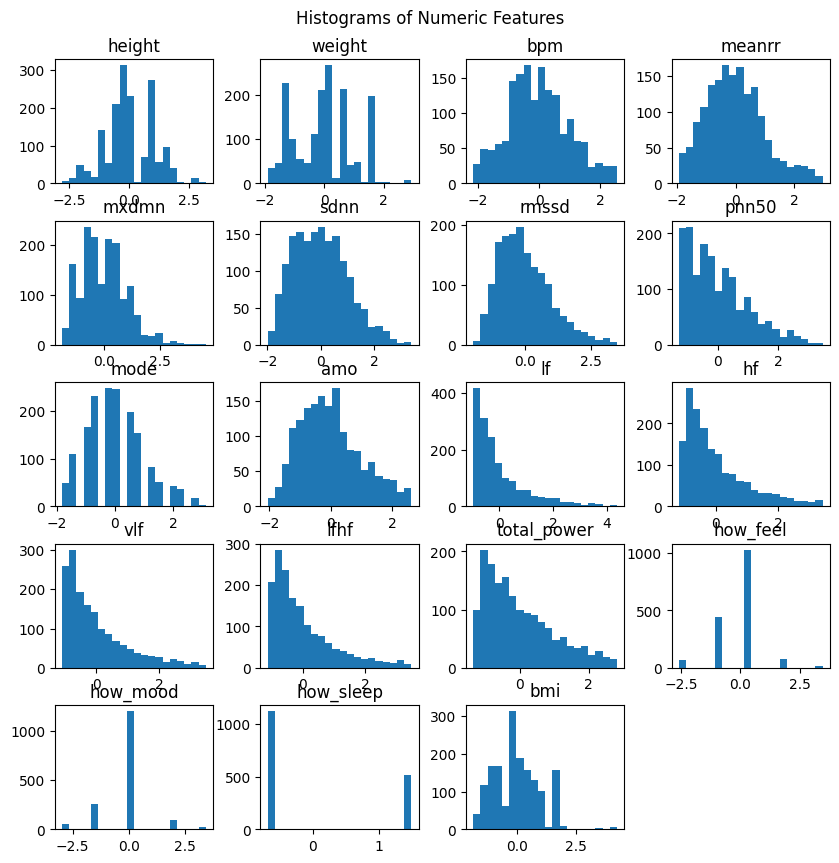

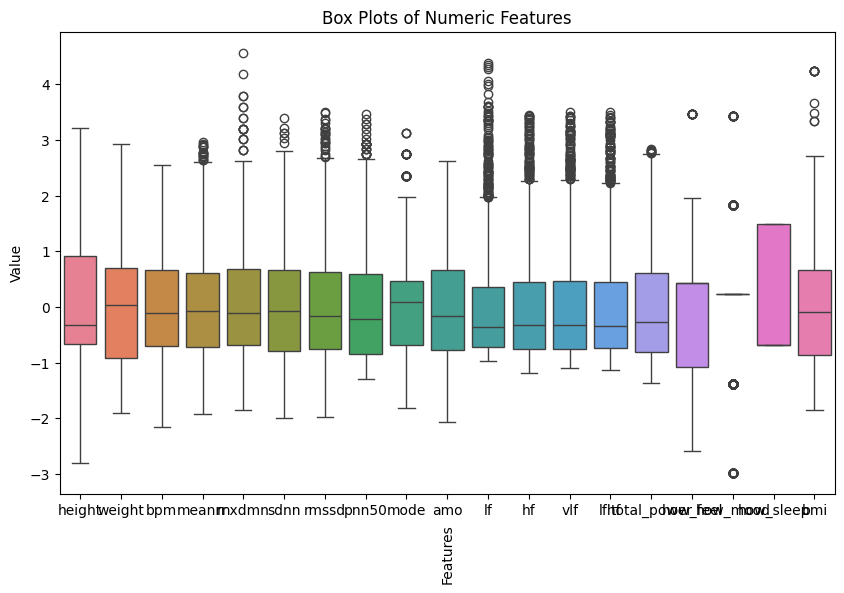

In [250]:
# Data Visualization
sns.pairplot(scaled_df, diag_kind = 'kde')
plt.suptitle('Visualizing', y=1.02)
plt.show()

#numeric_columns = imputed_data.select_dtypes(include=[np.number]).columns

# Visualize distributions
scaled_df.hist(bins=20, figsize=(10,10), grid=False)
plt.suptitle('Histograms of Numeric Features', y=0.93)
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_df)
plt.title('Box Plots of Numeric Features')
plt.xlabel('Features', rotation='vertical')
plt.ylabel('Value')
plt.show()


### Interpretation

Pair Plot:
This visualization shows the relationships between pairs of features.

Histograms:
Histograms display the distribution of each numerical feature. By observing the histograms, we can observe the distribution and skewness visually,.

Box Plots:
Box plots highlight the spread of the data and potential outliers. By observing the box plots, LF, HF, VLF, Total_power values have multiple outliers even after removing outliers. Data does not have valid ranges and has multiple outliers that is difficult to understand which are outliers or not. By observing this informaiton, it is difficult to understand what the reasons are for having this many outliers. 



## Additional Insight - Analysis of Relationship Between BMI vs. Avg Time between each Heartbeat

Let's understand if there is any relationship between BMI and avg time between each heartbeat.

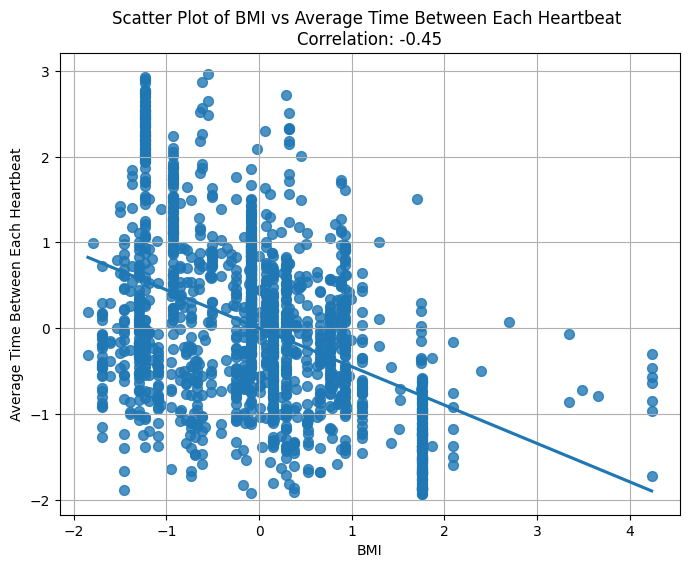

In [254]:
#Finding out correlation between BMI values and Mean RR values.
correlation = scaled_df['bmi'].corr(scaled_df['meanrr'])

#Plotting the regression line % each of the points
plt.figure(figsize=(8, 6))
sns.regplot(x='bmi', y='meanrr', data=scaled_df, ci=None, scatter_kws={"s": 50})
plt.title(f'Scatter Plot of BMI vs Average Time Between Each Heartbeat \nCorrelation: {correlation:.2f}')
plt.xlabel('BMI')
plt.ylabel('Average Time Between Each Heartbeat')
plt.grid(True)
plt.show()

#### Interpretation

There is moderate correlation between BMI and avg time between each heartbeat with correlation of -0.45.